<h1><center><b>Deep Learning for Machine Perception</b></center></h1>
<h3><center>Final Project</center></h3>
<center>Noam Yakov</center>

___
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/noamyakov/SimCLR-Project/blob/main/SimCLR.ipynb)

# SimCLR Training - ImageNet

We will train the following 3 pairs of pre-trained models:


1.   ResNet18 and ResNet34 models
2.   VGG11 and VGG13 models
3.   ResNet18 and VGG11 models

For each of these, we will also compute the contrastive loss of every epoch. In addition, we run T-SNE on the output models in order to see if they really did learn representations of distinct classes.

Notice that our first pair of models uses train batch size of 256, while the second uses 64, and the third 128. This inconcistency is due to our hardware limitations.

In [5]:
from training.imagenet_dataset import load_imagenet_data
from training.self_supervised_learning import simclr
from visualizations import plot_metrics_along_epochs, simclr_features_embedding

### ResNet18 + ResNet34

In [ ]:
# Load the ImageNet dataset again in order to train on the largest batch size we can using our hardware.
train_loader, raw_train_loader, test_loader = load_imagenet_data(
    train_dir='imagenet-mini/train', test_dir='imagenet-mini/val', aug_batch_size=256, no_aug_batch_size=64
)

Epoch 1:	Contrastive Loss: 4.323
Epoch 2:	Contrastive Loss: 1.948
Epoch 3:	Contrastive Loss: 1.412
Epoch 4:	Contrastive Loss: 1.206
Epoch 5:	Contrastive Loss: 1.071
Epoch 6:	Contrastive Loss: 0.963
Epoch 7:	Contrastive Loss: 0.885
Epoch 8:	Contrastive Loss: 0.848
Epoch 9:	Contrastive Loss: 0.812
Epoch 10:	Contrastive Loss: 0.790


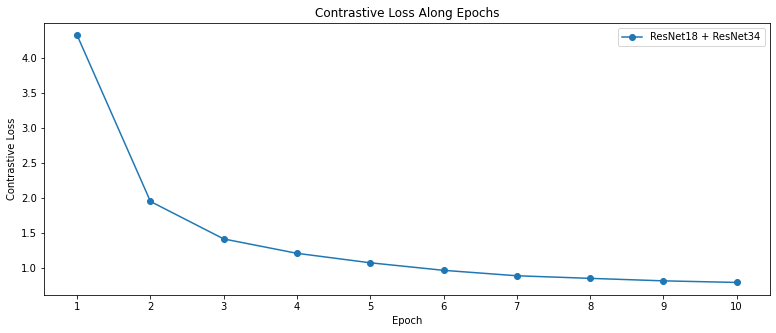

In [ ]:
# Train together ResNet18 and ResNet34 models with the SimCLR method.
losses_resnet18_resnet34 = simclr(
    'ResNet18', 'ResNet34', train_loader, learning_rate=0.001, momentum=0.9, temperature=0.05, n_epochs=10
)

# Plot the losses along the epochs.
plot_metrics_along_epochs(
    metrics={
        'ResNet18 + ResNet34': losses_resnet18_resnet34,
    },
    unit_of_measurement='Contrastive Loss'
)

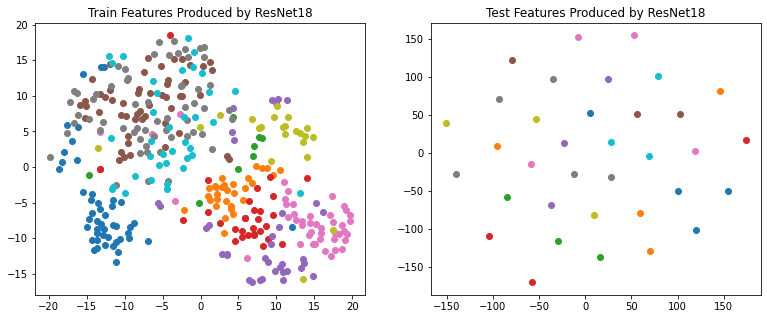

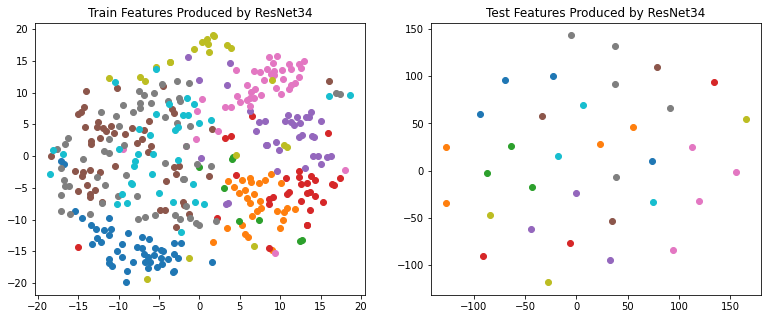

In [ ]:
simclr_features_embedding('ResNet18', 'ResNet34', raw_train_loader, test_loader, max_n_classes=10)

### VGG11 + VGG13

In [ ]:
# Load the ImageNet dataset again in order to train on the largest batch size we can using our hardware.
train_loader, raw_train_loader, test_loader = load_imagenet_data(
    train_dir='imagenet-mini/train', test_dir='imagenet-mini/val', aug_batch_size=64, no_aug_batch_size=64
)

Epoch 1:	Contrastive Loss: 2.435
Epoch 2:	Contrastive Loss: 1.404
Epoch 3:	Contrastive Loss: 1.125
Epoch 4:	Contrastive Loss: 0.937
Epoch 5:	Contrastive Loss: 0.867
Epoch 6:	Contrastive Loss: 0.800
Epoch 7:	Contrastive Loss: 0.761
Epoch 8:	Contrastive Loss: 0.744
Epoch 9:	Contrastive Loss: 0.696
Epoch 10:	Contrastive Loss: 0.689


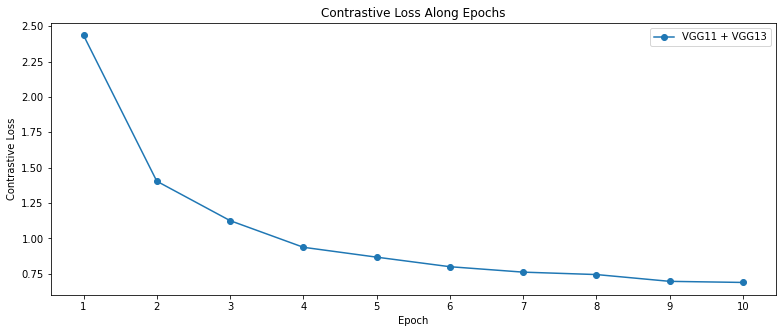

In [ ]:
# Train together VGG11 and VGG13 models with the SimCLR method.
losses_vgg11_vgg13 = simclr(
    'VGG11', 'VGG13', train_loader, learning_rate=0.001, momentum=0.9, temperature=0.05, n_epochs=10
)

# Plot the losses along the epochs.
plot_metrics_along_epochs(
    metrics={
        'VGG11 + VGG13': losses_vgg11_vgg13,
    },
    unit_of_measurement='Contrastive Loss'
)

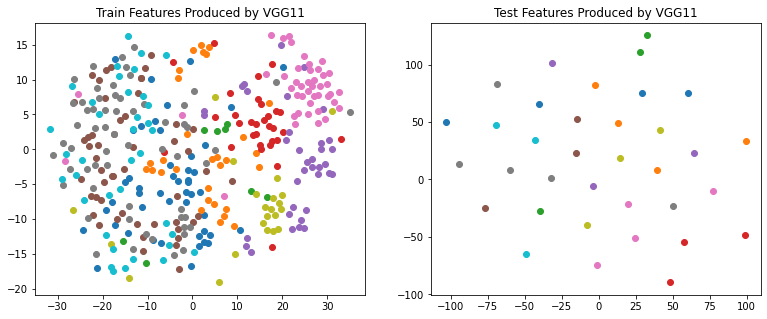

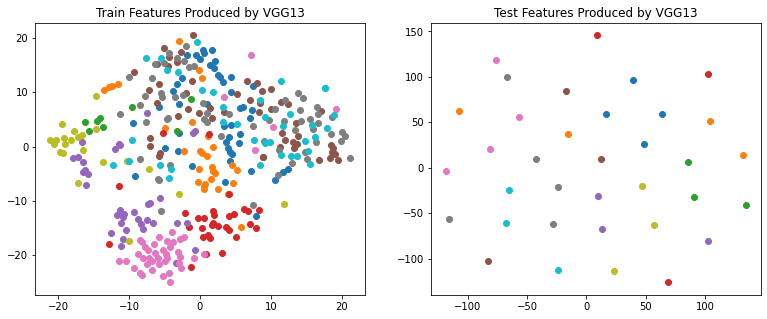

In [ ]:
simclr_features_embedding('VGG11', 'VGG13', raw_train_loader, test_loader, max_n_classes=10)

## ResNet18 + VGG11

In [ ]:
# Load the ImageNet dataset again in order to train on the largest batch size we can using our hardware.
train_loader, raw_train_loader, test_loader = load_imagenet_data(
    train_dir='imagenet-mini/train', test_dir='imagenet-mini/val', aug_batch_size=128, no_aug_batch_size=64
)

Epoch 1:	Contrastive Loss: 4.730
Epoch 2:	Contrastive Loss: 2.652
Epoch 3:	Contrastive Loss: 1.830
Epoch 4:	Contrastive Loss: 1.456
Epoch 5:	Contrastive Loss: 1.267
Epoch 6:	Contrastive Loss: 1.132
Epoch 7:	Contrastive Loss: 1.047
Epoch 8:	Contrastive Loss: 0.993
Epoch 9:	Contrastive Loss: 0.945
Epoch 10:	Contrastive Loss: 0.901


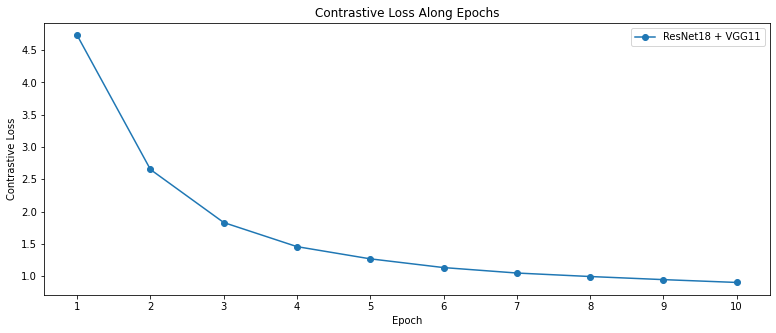

In [ ]:
# Train together ResNet18 and VGG11 models with the SimCLR method.
losses_resnet18_vgg11 = simclr(
    'ResNet18', 'VGG11', train_loader, learning_rate=0.001, momentum=0.9, temperature=0.05, n_epochs=10
)

# Plot the losses along the epochs.
plot_metrics_along_epochs(
    metrics={
        'ResNet18 + VGG11': losses_resnet18_vgg11,
    },
    unit_of_measurement='Contrastive Loss'
)

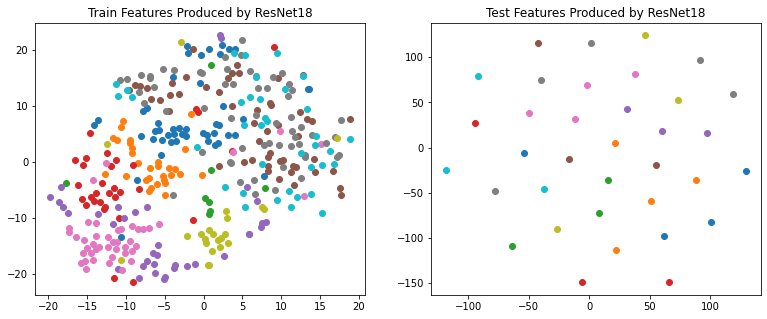

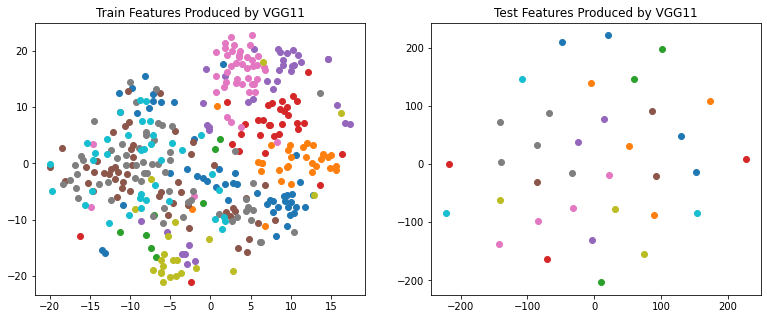

In [ ]:
simclr_features_embedding('ResNet18', 'VGG11', raw_train_loader, test_loader, max_n_classes=10)

## Comparison

Now we'll compare the results of the contrastive loss recorded by each pair of input models, along the epochs.

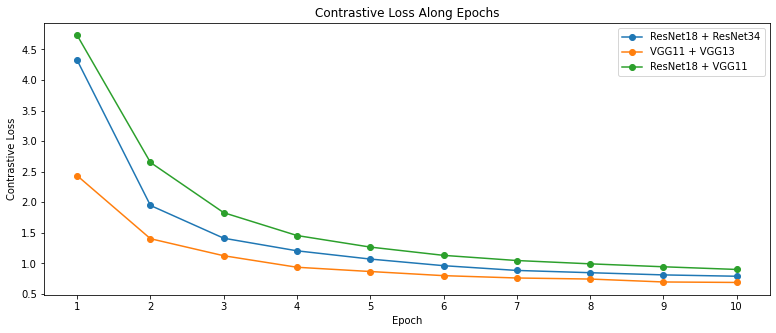

In [7]:
from visualizations import plot_metrics_along_epochs

plot_metrics_along_epochs(
    metrics={
        'ResNet18 + ResNet34': losses_resnet18_resnet34,
        'VGG11 + VGG13': losses_vgg11_vgg13,
        'ResNet18 + VGG11': losses_resnet18_vgg11
    },
    unit_of_measurement='Contrastive Loss'
)

We can see that all of these plots converge right near each other. It means that all of our pair of models have succeed to learn representations. The T-SNE results shows it too.

Our second pair (the VGGs) starts with the lowest loss level at the begining. This is probably because of its relativly low batch size - larger batch size contains more "negative examples" then smaller ones (images within the same batch that are taken from different classes).

The third pair (combination of ResNet and VGG) has the highest loss level at the begining. A possible explenation for this is that these models behave different and it causes them to represent images in different ways.

# Evaluation - CIFAR10

We can now evaluate our output models by fine-tuning them on the Image Classification task, using the CIFAR10 dataset, and compare their accuracy results to regular pre-trained models of the same types.

In [ ]:
from evaluation.cifar10_dataset import load_cifar10_data

# Load the CIFAR10 dataset.
train_loader, test_loader = load_cifar10_data(batch_size=64)
CIFAR10_N_CLASSES = 10

## Fine-tuning Pre-trained Models

For full comparesion, we should fine-tune each of the 4 models we have used earlier:


1.   ResNet18 model
2.   ResNet34 model
3.   VGG11 model
4.   VGG13 model



In [2]:
from evaluation.fine_tuning import fine_tune_pretrained_model
from visualizations import plot_metrics_along_epochs

### ResNet18

Epoch 1:	Train Loss: 0.482	Test Loss: 0.229	Train Accuracy: 0.946	Test Accuracy: 0.925
Epoch 2:	Train Loss: 0.173	Test Loss: 0.174	Train Accuracy: 0.976	Test Accuracy: 0.942
Epoch 3:	Train Loss: 0.105	Test Loss: 0.162	Train Accuracy: 0.991	Test Accuracy: 0.945
Epoch 4:	Train Loss: 0.064	Test Loss: 0.159	Train Accuracy: 0.997	Test Accuracy: 0.946
Epoch 5:	Train Loss: 0.039	Test Loss: 0.164	Train Accuracy: 0.999	Test Accuracy: 0.946


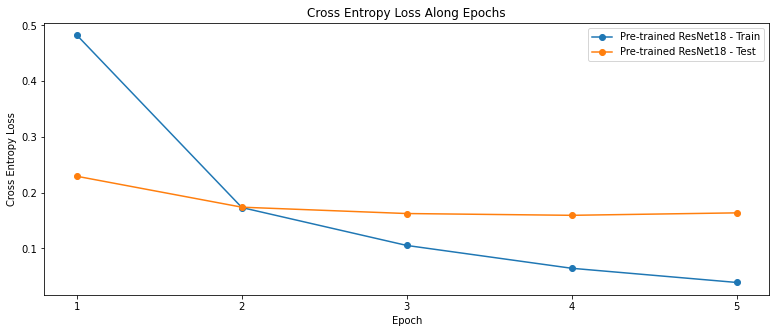

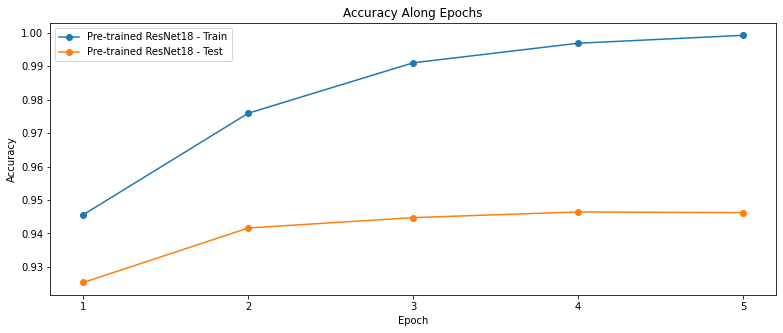

In [4]:
# Fine-tune a pre-trained ResNet18 model.
metrics_resnet18 = fine_tune_pretrained_model(
    'ResNet18', train_loader, test_loader, n_classes=CIFAR10_N_CLASSES, learning_rate=0.001, momentum=0.9, n_epochs=5
)

# Plot the losses along the epochs.
plot_metrics_along_epochs(
    metrics={
        'Pre-trained ResNet18 - Train': metrics_resnet18[0],
        'Pre-trained ResNet18 - Test': metrics_resnet18[1],
    },
    unit_of_measurement='Cross Entropy Loss'
)
# Plot the accuracies along the epochs.
plot_metrics_along_epochs(
    metrics={
        'Pre-trained ResNet18 - Train': metrics_resnet18[2],
        'Pre-trained ResNet18 - Test': metrics_resnet18[3],
    },
    unit_of_measurement='Accuracy'
)

### ResNet34

Epoch 1:	Train Loss: 0.381	Test Loss: 0.165	Train Accuracy: 0.969	Test Accuracy: 0.943
Epoch 2:	Train Loss: 0.113	Test Loss: 0.136	Train Accuracy: 0.990	Test Accuracy: 0.952
Epoch 3:	Train Loss: 0.052	Test Loss: 0.135	Train Accuracy: 0.997	Test Accuracy: 0.955
Epoch 4:	Train Loss: 0.027	Test Loss: 0.135	Train Accuracy: 0.999	Test Accuracy: 0.956
Epoch 5:	Train Loss: 0.014	Test Loss: 0.135	Train Accuracy: 1.000	Test Accuracy: 0.958


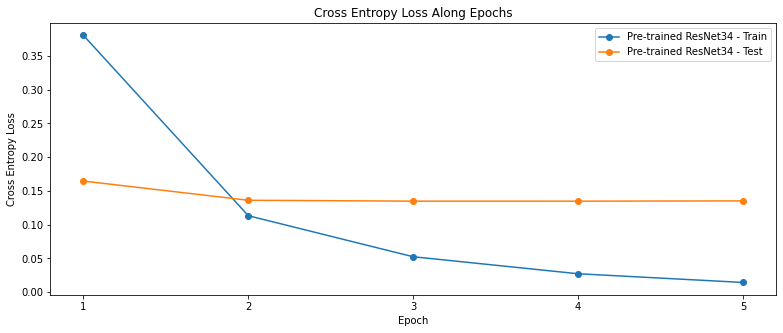

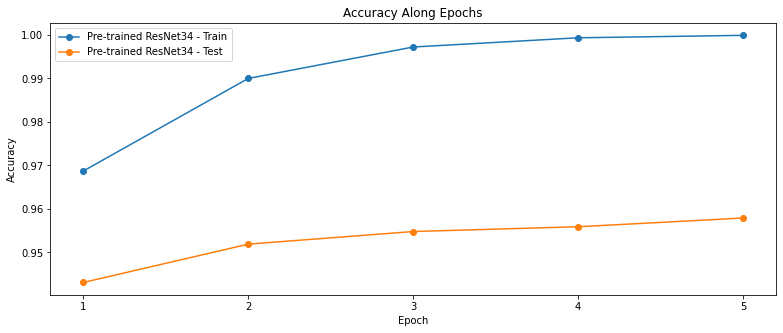

In [4]:
# Fine-tune a pre-trained ResNet34 model.
metrics_resnet34 = fine_tune_pretrained_model(
    'ResNet34', train_loader, test_loader, n_classes=CIFAR10_N_CLASSES, learning_rate=0.001, momentum=0.9, n_epochs=5
)d

# Plot the losses along the epochs.
plot_metrics_along_epochs(
    metrics={
        'Pre-trained ResNet34 - Train': metrics_resnet34[0],
        'Pre-trained ResNet34 - Test': metrics_resnet34[1],
    },
    unit_of_measurement='Cross Entropy Loss'
)
# Plot the accuracies along the epochs.
plot_metrics_along_epochs(
    metrics={
        'Pre-trained ResNet34 - Train': metrics_resnet34[2],
        'Pre-trained ResNet34 - Test': metrics_resnet34[3],
    },
    unit_of_measurement='Accuracy'
)

### VGG11

Epoch 1:	Train Loss: 0.507	Test Loss: 0.322	Train Accuracy: 0.918	Test Accuracy: 0.890
Epoch 2:	Train Loss: 0.269	Test Loss: 0.270	Train Accuracy: 0.946	Test Accuracy: 0.906
Epoch 3:	Train Loss: 0.189	Test Loss: 0.280	Train Accuracy: 0.955	Test Accuracy: 0.905
Epoch 4:	Train Loss: 0.138	Test Loss: 0.234	Train Accuracy: 0.983	Test Accuracy: 0.921
Epoch 5:	Train Loss: 0.099	Test Loss: 0.252	Train Accuracy: 0.987	Test Accuracy: 0.920


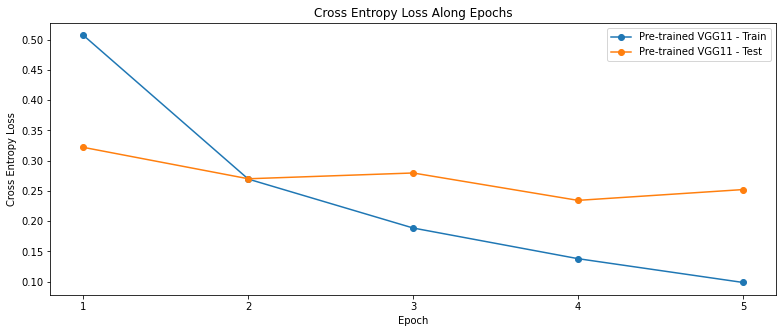

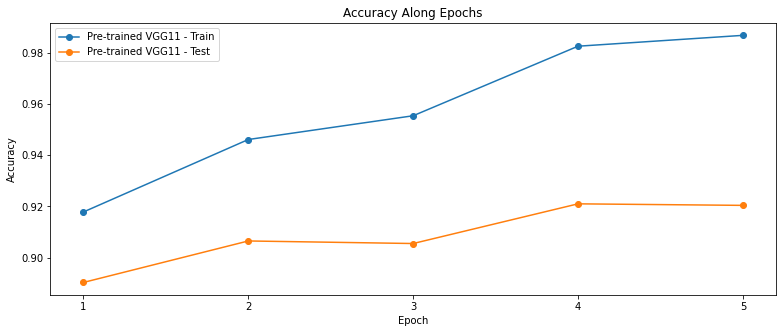

In [3]:
# Fine-tune a pre-trained VGG11 model.
metrics_vgg11 = fine_tune_pretrained_model(
    'VGG11', train_loader, test_loader, n_classes=CIFAR10_N_CLASSES, learning_rate=0.001, momentum=0.9, n_epochs=5
)

# Plot the losses along the epochs.
plot_metrics_along_epochs(
    metrics={
        'Pre-trained VGG11 - Train': metrics_vgg11[0],
        'Pre-trained VGG11 - Test': metrics_vgg11[1],
    },
    unit_of_measurement='Cross Entropy Loss'
)
# Plot the accuracies along the epochs.
plot_metrics_along_epochs(
    metrics={
        'Pre-trained VGG11 - Train': metrics_vgg11[2],
        'Pre-trained VGG11 - Test': metrics_vgg11[3],
    },
    unit_of_measurement='Accuracy'
)

### VGG13

Epoch 1:	Train Loss: 0.512	Test Loss: 0.354	Train Accuracy: 0.906	Test Accuracy: 0.878
Epoch 2:	Train Loss: 0.261	Test Loss: 0.246	Train Accuracy: 0.955	Test Accuracy: 0.915
Epoch 3:	Train Loss: 0.182	Test Loss: 0.237	Train Accuracy: 0.968	Test Accuracy: 0.917
Epoch 4:	Train Loss: 0.130	Test Loss: 0.242	Train Accuracy: 0.979	Test Accuracy: 0.919
Epoch 5:	Train Loss: 0.089	Test Loss: 0.238	Train Accuracy: 0.988	Test Accuracy: 0.924


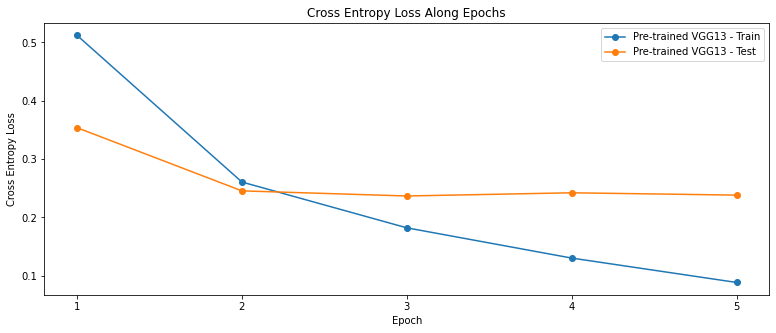

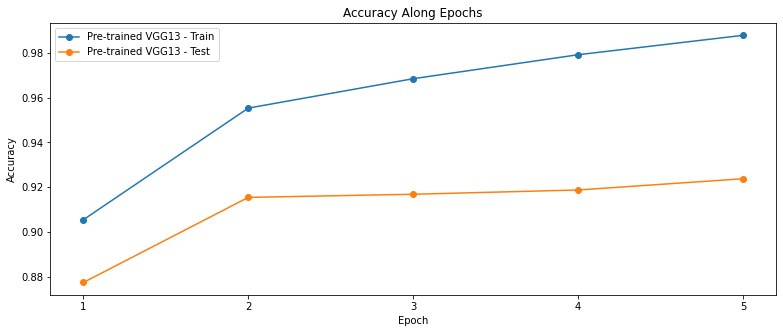

In [ ]:
# Fine-tune a pre-trained VGG13 model.
metrics_vgg13 = fine_tune_pretrained_model(
    'VGG13', train_loader, test_loader, n_classes=CIFAR10_N_CLASSES, learning_rate=0.001, momentum=0.9, n_epochs=5
)

# Plot the losses along the epochs.
plot_metrics_along_epochs(
    metrics={
        'Pre-trained VGG13 - Train': metrics_vgg13[0],
        'Pre-trained VGG13 - Test': metrics_vgg13[1],
    },
    unit_of_measurement='Cross Entropy Loss'
)
# Plot the accuracies along the epochs.
plot_metrics_along_epochs(
    metrics={
        'Pre-trained VGG13 - Train': metrics_vgg13[2],
        'Pre-trained VGG13 - Test': metrics_vgg13[3],
    },
    unit_of_measurement='Accuracy'
)

## Fine-tuning SimCLR Models

For each pair of models we trained with SimCLR, we should now evaluate each of the models seperatly.

In [ ]:
from evaluation.fine_tuning import fine_tune_saved_simclr_models
from visualizations import plot_metrics_along_epochs

#### ResNet18 + ResNet34

Epoch 1:	Train Loss: 0.517	Test Loss: 0.246	Train Accuracy: 0.940	Test Accuracy: 0.916
Epoch 2:	Train Loss: 0.189	Test Loss: 0.195	Train Accuracy: 0.968	Test Accuracy: 0.935
Epoch 3:	Train Loss: 0.118	Test Loss: 0.172	Train Accuracy: 0.987	Test Accuracy: 0.941
Epoch 4:	Train Loss: 0.075	Test Loss: 0.172	Train Accuracy: 0.993	Test Accuracy: 0.943
Epoch 5:	Train Loss: 0.045	Test Loss: 0.164	Train Accuracy: 0.999	Test Accuracy: 0.947
Epoch 1:	Train Loss: 0.416	Test Loss: 0.172	Train Accuracy: 0.965	Test Accuracy: 0.942
Epoch 2:	Train Loss: 0.121	Test Loss: 0.141	Train Accuracy: 0.988	Test Accuracy: 0.952
Epoch 3:	Train Loss: 0.062	Test Loss: 0.133	Train Accuracy: 0.996	Test Accuracy: 0.954
Epoch 4:	Train Loss: 0.031	Test Loss: 0.132	Train Accuracy: 0.999	Test Accuracy: 0.958
Epoch 5:	Train Loss: 0.017	Test Loss: 0.138	Train Accuracy: 1.000	Test Accuracy: 0.956


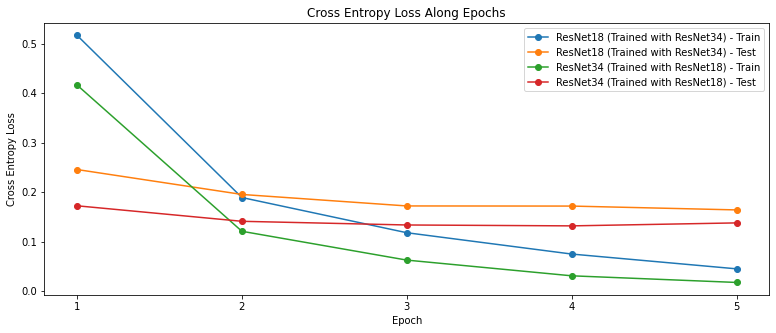

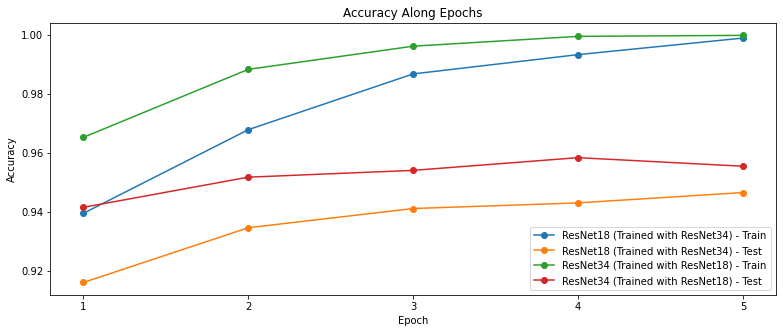

In [ ]:
# Fine-tune ResNet18 and ResNet34 models that were trained together with SimCLR.
metrics_resnet18_resnet34, metrics_resnet34_resnet18 = fine_tune_saved_simclr_models(
    'ResNet18', 'ResNet34', train_loader, test_loader, n_classes=CIFAR10_N_CLASSES, learning_rate=0.001, momentum=0.9,
    n_epochs=5
)

# Plot the losses along the epochs.
plot_metrics_along_epochs(
    metrics={
        'ResNet18 (Trained with ResNet34) - Train': metrics_resnet18_resnet34[0],
        'ResNet18 (Trained with ResNet34) - Test': metrics_resnet18_resnet34[1],
        'ResNet34 (Trained with ResNet18) - Train': metrics_resnet34_resnet18[0],
        'ResNet34 (Trained with ResNet18) - Test': metrics_resnet34_resnet18[1],
    },
    unit_of_measurement='Cross Entropy Loss'
)
# Plot the accuracies along the epochs.
plot_metrics_along_epochs(
    metrics={
        'ResNet18 (Trained with ResNet34) - Train': metrics_resnet18_resnet34[2],
        'ResNet18 (Trained with ResNet34) - Test': metrics_resnet18_resnet34[3],
        'ResNet34 (Trained with ResNet18) - Train': metrics_resnet34_resnet18[2],
        'ResNet34 (Trained with ResNet18) - Test': metrics_resnet34_resnet18[3],
    },
    unit_of_measurement='Accuracy'
)

### VGG11 + VGG13

Epoch 1:	Train Loss: 0.576	Test Loss: 0.336	Train Accuracy: 0.907	Test Accuracy: 0.884
Epoch 2:	Train Loss: 0.295	Test Loss: 0.283	Train Accuracy: 0.939	Test Accuracy: 0.902
Epoch 3:	Train Loss: 0.211	Test Loss: 0.265	Train Accuracy: 0.958	Test Accuracy: 0.908
Epoch 4:	Train Loss: 0.154	Test Loss: 0.239	Train Accuracy: 0.975	Test Accuracy: 0.918
Epoch 5:	Train Loss: 0.113	Test Loss: 0.249	Train Accuracy: 0.983	Test Accuracy: 0.923
Epoch 1:	Train Loss: 0.570	Test Loss: 0.329	Train Accuracy: 0.912	Test Accuracy: 0.884
Epoch 2:	Train Loss: 0.291	Test Loss: 0.283	Train Accuracy: 0.940	Test Accuracy: 0.901
Epoch 3:	Train Loss: 0.203	Test Loss: 0.268	Train Accuracy: 0.958	Test Accuracy: 0.907
Epoch 4:	Train Loss: 0.144	Test Loss: 0.241	Train Accuracy: 0.979	Test Accuracy: 0.919
Epoch 5:	Train Loss: 0.103	Test Loss: 0.254	Train Accuracy: 0.985	Test Accuracy: 0.920


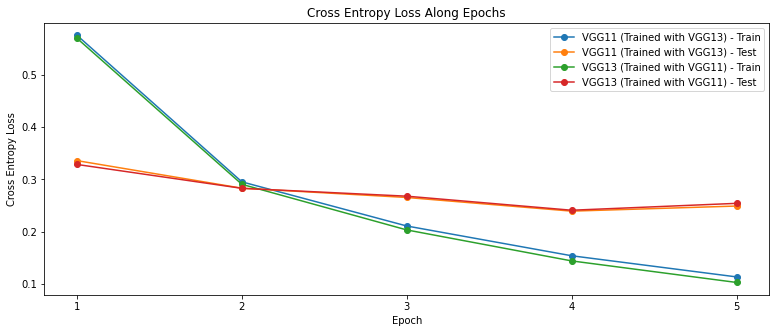

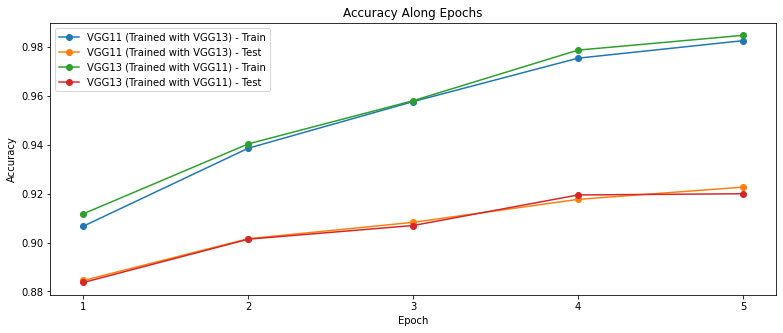

In [ ]:
# Fine-tune VGG11 and VGG13 models that were trained together with SimCLR.
metrics_vgg11_vgg13, metrics_vgg13_vgg11 = fine_tune_saved_simclr_models(
    'VGG11', 'VGG13', train_loader, test_loader, n_classes=CIFAR10_N_CLASSES, learning_rate=0.001, momentum=0.9,
    n_epochs=5
)

# Plot the losses along the epochs.
plot_metrics_along_epochs(
    metrics={
        'VGG11 (Trained with VGG13) - Train': metrics_vgg11_vgg13[0],
        'VGG11 (Trained with VGG13) - Test': metrics_vgg11_vgg13[1],
        'VGG13 (Trained with VGG11) - Train': metrics_vgg13_vgg11[0],
        'VGG13 (Trained with VGG11) - Test': metrics_vgg13_vgg11[1],
    },
    unit_of_measurement='Cross Entropy Loss'
)
# Plot the accuracies along the epochs.
plot_metrics_along_epochs(
    metrics={
        'VGG11 (Trained with VGG13) - Train': metrics_vgg11_vgg13[2],
        'VGG11 (Trained with VGG13) - Test': metrics_vgg11_vgg13[3],
        'VGG13 (Trained with VGG11) - Train': metrics_vgg13_vgg11[2],
        'VGG13 (Trained with VGG11) - Test': metrics_vgg13_vgg11[3],
    },
    unit_of_measurement='Accuracy'
)

### ResNet18 + VGG11

Epoch 1:	Train Loss: 0.550	Test Loss: 0.247	Train Accuracy: 0.938	Test Accuracy: 0.919
Epoch 2:	Train Loss: 0.200	Test Loss: 0.191	Train Accuracy: 0.969	Test Accuracy: 0.933
Epoch 3:	Train Loss: 0.125	Test Loss: 0.172	Train Accuracy: 0.985	Test Accuracy: 0.940
Epoch 4:	Train Loss: 0.079	Test Loss: 0.170	Train Accuracy: 0.993	Test Accuracy: 0.944
Epoch 5:	Train Loss: 0.050	Test Loss: 0.167	Train Accuracy: 0.999	Test Accuracy: 0.945
Epoch 1:	Train Loss: 0.554	Test Loss: 0.364	Train Accuracy: 0.897	Test Accuracy: 0.870
Epoch 2:	Train Loss: 0.286	Test Loss: 0.277	Train Accuracy: 0.944	Test Accuracy: 0.904
Epoch 3:	Train Loss: 0.199	Test Loss: 0.274	Train Accuracy: 0.953	Test Accuracy: 0.904
Epoch 4:	Train Loss: 0.149	Test Loss: 0.236	Train Accuracy: 0.977	Test Accuracy: 0.919
Epoch 5:	Train Loss: 0.104	Test Loss: 0.290	Train Accuracy: 0.974	Test Accuracy: 0.908


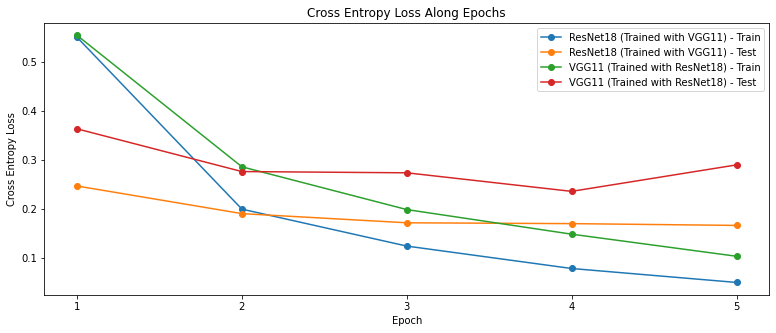

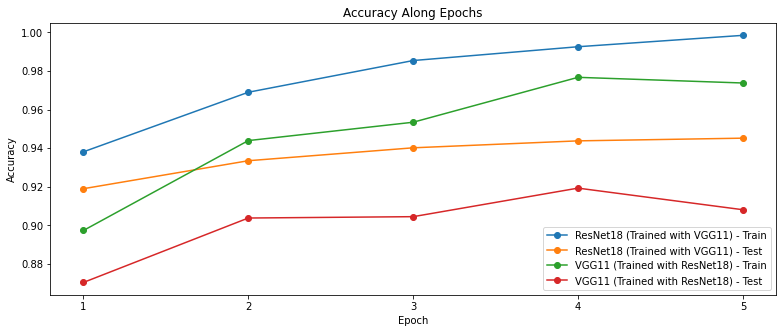

In [ ]:
# Fine-tune ResNet18 and VGG11 models that were trained together with SimCLR.
metrics_resnet18_vgg11, metrics_vgg11_resnet18 = fine_tune_saved_simclr_models(
    'ResNet18', 'VGG11', train_loader, test_loader, n_classes=CIFAR10_N_CLASSES, learning_rate=0.001, momentum=0.9,
    n_epochs=5
)

# Plot the losses along the epochs.
plot_metrics_along_epochs(
    metrics={
        'ResNet18 (Trained with VGG11) - Train': metrics_resnet18_vgg11[0],
        'ResNet18 (Trained with VGG11) - Test': metrics_resnet18_vgg11[1],
        'VGG11 (Trained with ResNet18) - Train': metrics_vgg11_resnet18[0],
        'VGG11 (Trained with ResNet18) - Test': metrics_vgg11_resnet18[1],
    },
    unit_of_measurement='Cross Entropy Loss'
)
# Plot the accuracies along the epochs.
plot_metrics_along_epochs(
    metrics={
        'ResNet18 (Trained with VGG11) - Train': metrics_resnet18_vgg11[2],
        'ResNet18 (Trained with VGG11) - Test': metrics_resnet18_vgg11[3],
        'VGG11 (Trained with ResNet18) - Train': metrics_vgg11_resnet18[2],
        'VGG11 (Trained with ResNet18) - Test': metrics_vgg11_resnet18[3],
    },
    unit_of_measurement='Accuracy'
)

## Final Comparison

Now it's time to compare all the models fairly. We therefore compare all version of the same model type: the pre-trained version and all the SimCLR versions (there can be more than one SimCLR version).

In [3]:
from visualizations import plot_metrics_along_epochs

### ResNet18

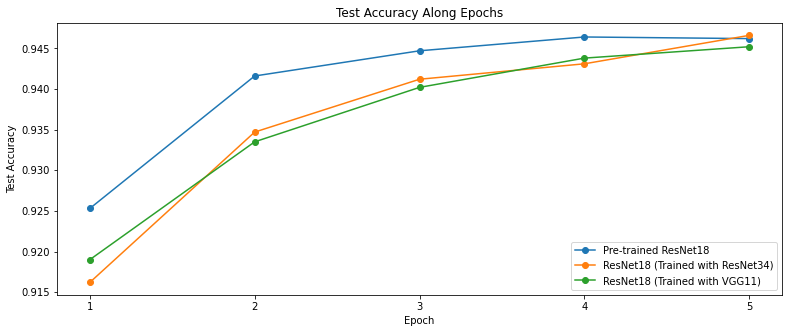

In [6]:
# Plot the final test accuracies along the epochs.
plot_metrics_along_epochs(
    metrics={
        'Pre-trained ResNet18': metrics_resnet18[3],
        'ResNet18 (Trained with ResNet34)': metrics_resnet18_resnet34[3],
        'ResNet18 (Trained with VGG11)': metrics_resnet18_vgg11[3],
    },
    unit_of_measurement='Test Accuracy'
)

### ResNet34

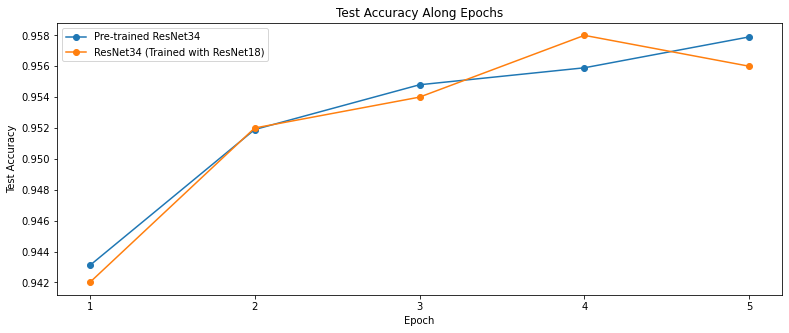

In [7]:
# Plot the final test accuracies along the epochs.
plot_metrics_along_epochs(
    metrics={
        'Pre-trained ResNet34': metrics_resnet34[3],
        'ResNet34 (Trained with ResNet18)': metrics_resnet34_resnet18[3],
    },
    unit_of_measurement='Test Accuracy'
)

### VGG11

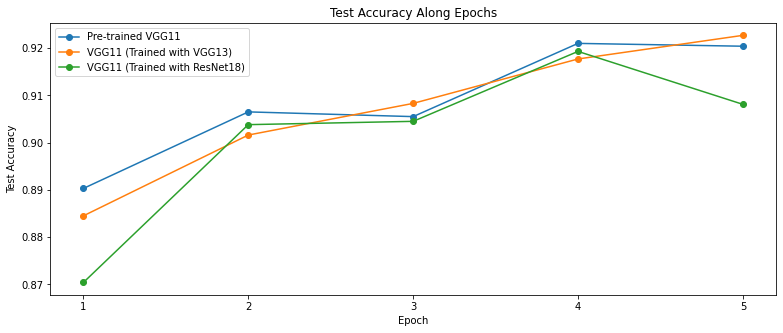

In [8]:
# Plot the final test accuracies along the epochs.
plot_metrics_along_epochs(
    metrics={
        'Pre-trained VGG11': metrics_vgg11[3],
        'VGG11 (Trained with VGG13)': metrics_vgg11_vgg13[3],
        'VGG11 (Trained with ResNet18)': metrics_vgg11_resnet18[3],
    },
    unit_of_measurement='Test Accuracy'
)

### VGG13

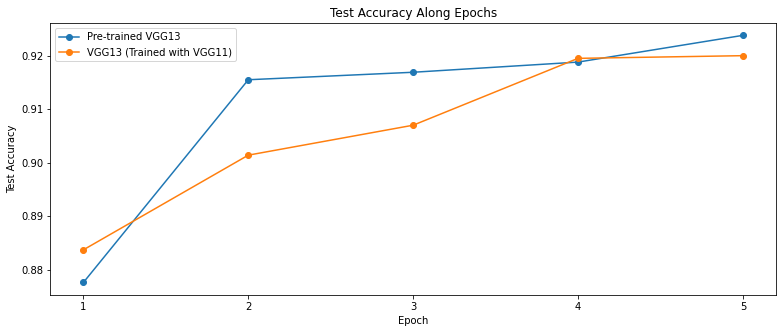

In [9]:
# Plot the final test accuracies along the epochs.
plot_metrics_along_epochs(
    metrics={
        'Pre-trained VGG13': metrics_vgg13[3],
        'VGG13 (Trained with VGG11)': metrics_vgg13_vgg11[3],
    },
    unit_of_measurement='Test Accuracy'
)

# Conclusions

We have seen that although applying SimCLR on pairs of pre-trained models can help each of them to learn visual representations, it isn't sufficient enough to overcome the great power of Supervised Learning. We saw that all of the fine-tuning results were about the same.